Итоговая работа
=====================

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling


from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier

In [15]:
data = pd.read_csv('taxi.csv')
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [8]:
data.shape

(100000, 14)

In [4]:
data.describe()

offer_gk    weekday_key       hour_key      driver_gk  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   5.662189e+05       3.159860      13.827790    3446.376360   
std    3.259360e+05       2.054222       7.306496    2038.738677   
min    4.000000e+00       0.000000       0.000000      14.000000   
25%    2.855552e+05       1.000000       8.000000    1421.000000   
50%    5.656715e+05       3.000000      16.000000    3506.500000   
75%    8.487198e+05       5.000000      20.000000    5242.000000   
max    1.130355e+06       6.000000      23.000000    6806.000000   

           order_gk  driver_latitude  driver_longitude  origin_order_latitude  \
count  100000.00000    100000.000000     100000.000000          100000.000000   
mean   460867.01291        55.700824         37.492292              55.772440   
std    266064.98953         2.135903          1.454640               0.665985   
min        18.00000        -1.000000         -1.000000              -1.000000   
25%    229178.50000        55.708651         37.413497              55.708032   
50%    462420.00000        55.772904         37.533664              55.772561   
75%    690894.00000        55.960667         37.624113              55.962000   
max    920344.00000        56.174097         38.280547              56.311121   

       origin_order_longitude    distance_km   duration_min  driver_response  
count           100000.000000  100000.000000  100000.000000    100000.000000  
mean                37.541637      18.393518      23.134841         0.492480  
std                  0.467758      41.129296      33.890105         0.499946  
min                 -1.000000      -1.000000      -1.000000         0.000000  
25%                 37.407117      -1.000000      -1.000000         0.000000  
50%                 37.532537      10.411500      19.700000         0.000000  
75%                 37.624358      30.665250      37.867000         1.000000  
max                 38.243608    5234.283000    3958.283000         1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [6]:
pandas_profiling.ProfileReport(data)

Итак, предварительный анализ показал, что у нас нет пропусков, но у многих данных подозрительные значения "-1", это могут быть потенциальные NaN. Посмотрим, сколько их:

In [8]:
data[data.loc[:, :] == -1].count()

offer_gk                      0
weekday_key                   0
hour_key                      0
driver_gk                     0
order_gk                      0
driver_latitude             140
driver_longitude            140
origin_order_latitude        13
origin_order_longitude       13
distance_km               26207
duration_min              26207
offer_class_group             0
ride_type_desc                0
driver_response               0
dtype: int64

В профайлере на матрице корреляций видно, что driver_latitude и driver_longitude, origin_order_latitude и origin_order_latitude, distance_km и duration_min сильно коррелируют между собой (что косвенно подтверждает анализ данных со значениями "-1"). 
Удалим из таблицы значения с корреляцией, большей чем 85%: если атрибуты имеют сильную корреляцию с другими атрибутами, нет смысла использовать два атрибута совместно.

In [16]:
# создаем матрицу корреляций
corr_matrix = data.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(to_drop)

['driver_longitude', 'origin_order_longitude', 'duration_min']


Удаляем колонки, которые коррелируют максимально друг с другом:

In [17]:
data = data.drop(data[to_drop], axis=1)
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   origin_order_latitude  distance_km offer_class_group ride_type_desc  \
0              55.814567       -1.000           Economy        private   
1              55.819329       18.802          Standard        private   
2              55.814827        6.747           Economy        private   
3              55.743469       -1.000           Economy        private   
4              55.812559       12.383           Economy        private   

   driver_response  
0                0  
1                1  
2                0  
3                1  
4                1

После удаления остается 11 колонок:

In [21]:
data.shape

(100000, 11)

    Уберем из датасета строки, содержащие значения = -1:

In [18]:
data = data[data.loc[:, :] != -1]

In [19]:
data = data.dropna()
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
4   1120055            4        16       6080    506710        55.803578   
5   1058203            6        15       6080    360328        55.818963   
7    128861            5        20       6080    254374        55.839318   

   origin_order_latitude  distance_km offer_class_group ride_type_desc  \
1              55.819329       18.802          Standard        private   
2              55.814827        6.747           Economy        private   
4              55.812559       12.383           Economy        private   
5              55.814827        6.747           Economy        private   
7              55.839134        1.517           Economy        private   

   driver_response  
1                1  
2                0  
4                1  
5                0  
7                0

In [47]:
data.shape

(73764, 11)

In [48]:
data.describe()

offer_gk   weekday_key      hour_key     driver_gk       order_gk  \
count  7.376400e+04  73764.000000  73764.000000  73764.000000   73764.000000   
mean   5.657813e+05      3.150277     13.800770   3461.403557  461943.905238   
std    3.262776e+05      2.078243      7.316096   2038.999686  266093.682962   
min    4.000000e+00      0.000000      0.000000     14.000000      27.000000   
25%    2.848948e+05      1.000000      8.000000   1421.000000  230752.750000   
50%    5.648260e+05      3.000000     16.000000   3507.000000  463115.500000   
75%    8.495752e+05      5.000000     20.000000   5246.000000  692512.000000   
max    1.130355e+06      6.000000     23.000000   6806.000000  920344.000000   

       driver_latitude  origin_order_latitude   distance_km  driver_response  
count     73764.000000           73764.000000  73764.000000     73764.000000  
mean         55.780046              55.780141     25.276109         0.471626  
std           0.258694               0.159564     45.954422         0.499198  
min           0.000000              55.342523      0.000000         0.000000  
25%          55.705835              55.705634      7.901000         0.000000  
50%          55.774828              55.775037     18.605000         0.000000  
75%          55.961102              55.962322     38.735000         1.000000  
max          56.018542              56.025061   5234.283000         1.000000

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73764 entries, 1 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   offer_gk               73764 non-null  int64  
 1   weekday_key            73764 non-null  int64  
 2   hour_key               73764 non-null  int64  
 3   driver_gk              73764 non-null  int64  
 4   order_gk               73764 non-null  int64  
 5   driver_latitude        73764 non-null  float64
 6   origin_order_latitude  73764 non-null  float64
 7   distance_km            73764 non-null  float64
 8   offer_class_group      73764 non-null  object 
 9   ride_type_desc         73764 non-null  object 
 10  driver_response        73764 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 6.2+ MB


Данные в столбце weekday_key по сути своей категориальные, и лучше к ним применить one-hot-encoding.
В offer_class_group оставим только Economy и Standard, а в ride_type_desc оставим только private и business, и далее применим к этим столбцам LabelEncoder.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
oh_enc = OneHotEncoder()

In [21]:
data = data.loc[data['offer_class_group'].isin(['Economy', 'Standard'])]

In [22]:
data = data.loc[data['ride_type_desc'].isin(['private', 'business'])]

In [23]:
week = oh_enc.fit_transform(data[['weekday_key']]).toarray()
week = pd.DataFrame(week, columns=oh_enc.categories_[0])
week.head(5)

0    1    2    3    4    5    6
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [24]:
data['offer_class_group'] = label_enc.fit_transform(data['offer_class_group'])
data['ride_type_desc'] = label_enc.fit_transform(data['ride_type_desc'])
data.head(5)

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
4   1120055            4        16       6080    506710        55.803578   
5   1058203            6        15       6080    360328        55.818963   
7    128861            5        20       6080    254374        55.839318   

   origin_order_latitude  distance_km  offer_class_group  ride_type_desc  \
1              55.819329       18.802                  1               1   
2              55.814827        6.747                  0               1   
4              55.812559       12.383                  0               1   
5              55.814827        6.747                  0               1   
7              55.839134        1.517                  0               1   

   driver_response  
1                1  
2                0  
4                1  
5                0  
7                0

In [25]:
data = week.join(data)
data.drop(['weekday_key'], axis=1, inplace=True)
data.head(5)

0    1    2    3    4    5    6   offer_gk  hour_key  driver_gk  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0        NaN       NaN        NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0   759733.0      14.0     6080.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0   416977.0      14.0     6080.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0        NaN       NaN        NaN   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1120055.0      16.0     6080.0   

   order_gk  driver_latitude  origin_order_latitude  distance_km  \
0       NaN              NaN                    NaN          NaN   
1  358774.0        55.805342              55.819329       18.802   
2  866260.0        55.813978              55.814827        6.747   
3       NaN              NaN                    NaN          NaN   
4  506710.0        55.803578              55.812559       12.383   

   offer_class_group  ride_type_desc  driver_response  
0                NaN             NaN              NaN  
1                1.0             1.0              1.0  
2                0.0             1.0              0.0  
3                NaN             NaN              NaN  
4                0.0             1.0              1.0

In [26]:
data = data.dropna()
data.head()

0    1    2    3    4    5    6   offer_gk  hour_key  driver_gk  \
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0   759733.0      14.0     6080.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0   416977.0      14.0     6080.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1120055.0      16.0     6080.0   
5  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1058203.0      15.0     6080.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  1.0   128861.0      20.0     6080.0   

   order_gk  driver_latitude  origin_order_latitude  distance_km  \
1  358774.0        55.805342              55.819329       18.802   
2  866260.0        55.813978              55.814827        6.747   
4  506710.0        55.803578              55.812559       12.383   
5  360328.0        55.818963              55.814827        6.747   
7  254374.0        55.839318              55.839134        1.517   

   offer_class_group  ride_type_desc  driver_response  
1                1.0             1.0              1.0  
2                0.0             1.0              0.0  
4                0.0             1.0              1.0  
5                0.0             1.0              0.0  
7                0.0             1.0              0.0

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50670 entries, 1 to 70710
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   0                      50670 non-null  float64
 1   1                      50670 non-null  float64
 2   2                      50670 non-null  float64
 3   3                      50670 non-null  float64
 4   4                      50670 non-null  float64
 5   5                      50670 non-null  float64
 6   6                      50670 non-null  float64
 7   offer_gk               50670 non-null  float64
 8   hour_key               50670 non-null  float64
 9   driver_gk              50670 non-null  float64
 10  order_gk               50670 non-null  float64
 11  driver_latitude        50670 non-null  float64
 12  origin_order_latitude  50670 non-null  float64
 13  distance_km            50670 non-null  float64
 14  offer_class_group      50670 non-null  float64
 15  ri

Выделим колонки в отдельный список

In [27]:
headers = list(data.columns.values)

Нормализуем параметры:

In [33]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

0    1    2    3    4    5    6         7         8         9        10  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.672121  0.608696  0.893899  0.389810   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.368890  0.608696  0.893899  0.941238   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.990893  0.695652  0.893899  0.550556   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.936173  0.652174  0.893899  0.391499   
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.113998  0.869565  0.893899  0.276370   

         11        12        13   14   15   16  
0  0.996194  0.682930  0.004500  1.0  1.0  1.0  
1  0.996348  0.675991  0.001615  0.0  1.0  0.0  
2  0.996163  0.672496  0.002964  0.0  1.0  1.0  
3  0.996437  0.675991  0.001615  0.0  1.0  0.0  
4  0.996801  0.713453  0.000363  0.0  1.0  0.0

При нормализации стираются названия колонок, поэтому необходимо восстановить их:

In [34]:
data_norm.columns = headers
data_norm.head()

0    1    2    3    4    5    6  offer_gk  hour_key  driver_gk  order_gk  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.672121  0.608696   0.893899  0.389810   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.368890  0.608696   0.893899  0.941238   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.990893  0.695652   0.893899  0.550556   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.936173  0.652174   0.893899  0.391499   
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.113998  0.869565   0.893899  0.276370   

   driver_latitude  origin_order_latitude  distance_km  offer_class_group  \
0         0.996194               0.682930     0.004500                1.0   
1         0.996348               0.675991     0.001615                0.0   
2         0.996163               0.672496     0.002964                0.0   
3         0.996437               0.675991     0.001615                0.0   
4         0.996801               0.713453     0.000363                0.0   

   ride_type_desc  driver_response  
0             1.0              1.0  
1             1.0              0.0  
2             1.0              1.0  
3             1.0              0.0  
4             1.0              0.0

Построим модель "Деревья решений":

In [36]:
output_y = data_norm.iloc[:,16:]
input_x = data_norm.iloc[:,:16]


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(output_y)
Y=np.ravel(Y)

In [44]:
# Разделим выборку на тестовую и обучающую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, Y, test_size=0.3)

In [45]:
# создаем модель деревья решений

model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


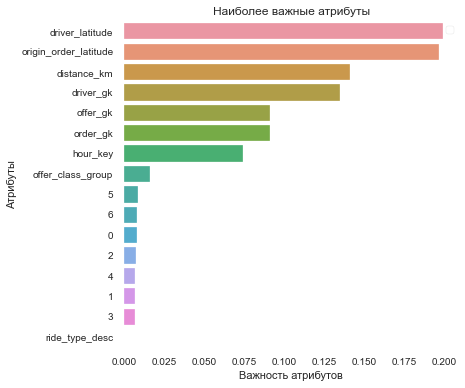

In [46]:
import seaborn as sns
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Оценим результативность модели с помощью classification report:

In [47]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      8139
           1       0.75      0.82      0.78      7062

    accuracy                           0.79     15201
   macro avg       0.79      0.79      0.79     15201
weighted avg       0.79      0.79      0.79     15201



0.7893559634234589

Точность модели составляет 79%

Как мы видим, больше всего на тот факт, возьмёт ли таксист заказ или нет, влияет местоположение и водителя и заказа, а также километраж и driver_gk